### QUICK REVISION NOTES 12

In [1]:
# Avoiding warning
#import warnings
#warnings.filterwarnings('ignore')

# Importing additional packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Seaborn

1. Seaborn is a python data visualisation library built on top of matplotlib
2. It provides a high-level interface for drawing attractive and informative statistical graphs

### Importing seaborn

In [2]:
import seaborn as sns
print(sns.__version__)
print(len(dir(sns)))

0.11.0
97


In [3]:
# Types of seaborn plots

    # sns.distplot
    # sns.kdeplot
    # sns.rugplot
    # sns.jointplot
    # sns.heatmap
    # sns.lmplot
    # sns.pairplot
    # sns.stripplot
    # sns.swarmplot
    # sns.boxplot
    # sns.violinplot
    # sns.catplot

In [4]:
# Importing dataset for visualisation

pkmn = pd.read_csv('Pokemon.csv')
pkmn.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


### sns.distplot()

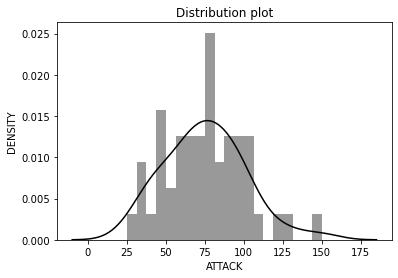

In [5]:
# Creating a simple distribution graph

dp = sns.distplot(pkmn['Attack'],
                  bins=20,
                  color='black')

dp.set_xlabel('ATTACK')
dp.set_ylabel('DENSITY')
dp.set_title('Distribution plot')

plt.show()

### sns.kdeplot()

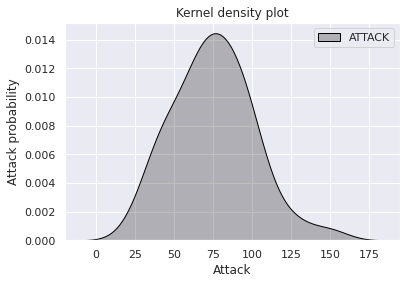

In [6]:
# Creating a simple kde plot

sns.set_theme()

kp = sns.kdeplot(pkmn['Attack'], 
                 fill=True, 
                 color='black',
                 label='ATTACK')

kp.set_ylabel('Attack probability')
kp.set_title('Kernel density plot')
kp.legend()
plt.show()

### sns.rugplot()

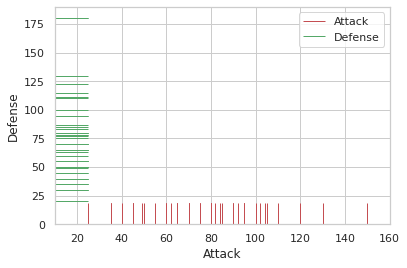

In [7]:
# Creating a simple rugplot

sns.set_theme(style='whitegrid')

rpa = sns.rugplot(pkmn['Attack'], 
                  height=0.1, 
                  color='r', 
                  label='Attack')

rpd = sns.rugplot(pkmn['Defense'], 
                  height=0.1, 
                  color='g', 
                  vertical=True, 
                  label='Defense')

plt.xlim(10,160)
plt.ylim(0,190)
plt.legend()
plt.show()

### Combining rug and kde plot

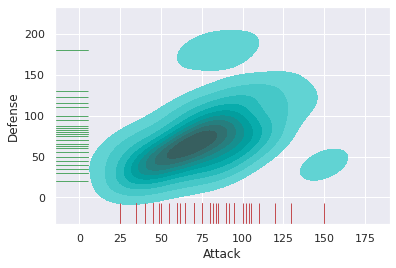

In [8]:
# Creating a simple combination of rug and kde plot

sns.set_theme(style='darkgrid')

sns.kdeplot(pkmn['Attack'],
            pkmn['Defense'],
            color='cyan',
            shade=True)

sns.rugplot(pkmn['Attack'],
            height = 0.1,
            color = 'r')

sns.rugplot(pkmn['Defense'],
            height = 0.1,
            color = 'g',
            vertical = True)

plt.show()

### Advanced sns.distplot()

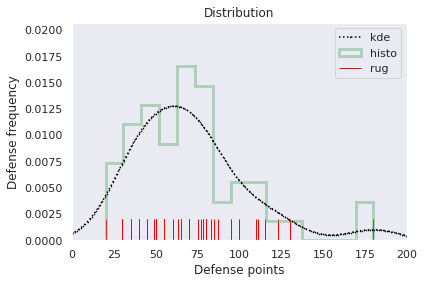

In [9]:
# Combination of distribution, kde and rug

sns.set_theme(style='dark')

cp = sns.distplot(pkmn['Defense'],
                  bins=15,
                  hist = True,
                  kde = True,
                  rug = True,
                  kde_kws = {'color':'black', 
                             'ls':':', 
                              'marker':'1', 
                              'markersize':'1.5',
                              'label':'kde'},
                  hist_kws = {'color':'g', 
                              'histtype':'step',
                              'lw':3,
                              'label':'histo'},
                  rug_kws = {'color':'red',
                             'height':0.1,
                             'label':'rug'})

cp.set_xlabel('Defense points')
cp.set_ylabel('Defense frequency')
cp.set_title('Distribution')

plt.xlim(0,200)
plt.legend()
plt.show()

### sns.jointplot()

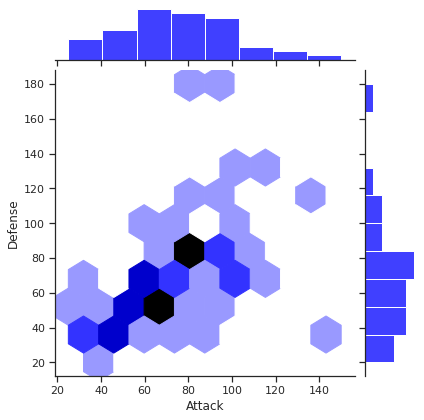

In [10]:
sns.set_theme(style='ticks')

sns.jointplot(x='Attack', 
              y='Defense',
              data=pkmn,
              kind='hex', #other kinds - scatter,kde,reg,resid
              color='blue')

plt.show()

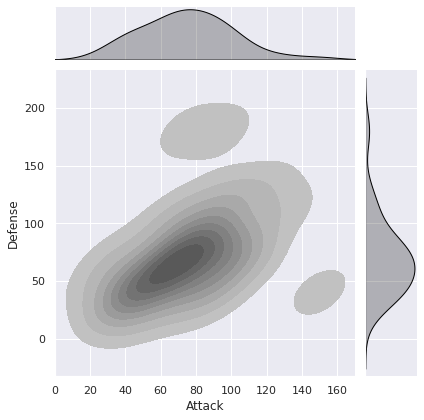

In [11]:
sns.set_theme(style='darkgrid')

sns.jointplot(x ='Attack', 
              y ='Defense',
              data = pkmn,
              xlim = {0,170}, 
              kind = 'kde',     #other kinds - scatter,hex,reg,resid
              color ='black',
              fill = True)

plt.show()

### sns.lmplot()

(20.0, 155.0)

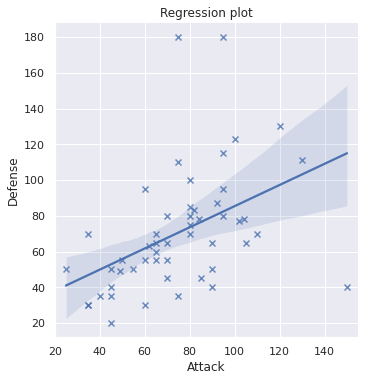

In [12]:
sns.set_theme(style='darkgrid')

lp = sns.lmplot(x='Attack',
           y = 'Defense',
           data = pkmn,
           markers='x')

plt.title('Regression plot')
plt.xlim(20,155)

### sns.heatmap()

In [13]:
del pkmn['Generation']
del pkmn['Legendary']

##### Creating a simple heatmap

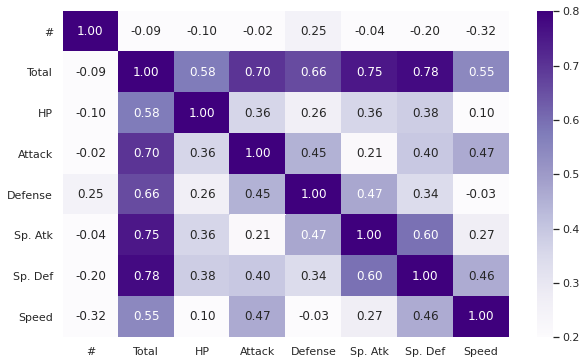

In [14]:
sns.set_theme(style='white')

plt.subplots(figsize=(10,6))
sns.heatmap(pkmn.corr(),
            annot = True,
            fmt = '.2f',
            vmin = 0.2,
            vmax = 0.8,
            cmap = 'Purples')

plt.show()

##### Creating a perfect shaped heat map with border lines

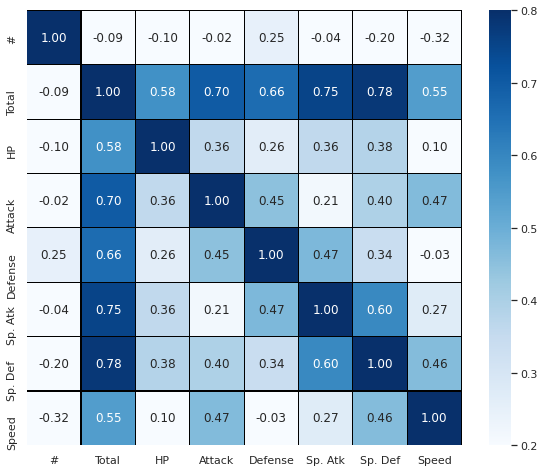

In [15]:
plt.subplots(figsize=(10,8))

sns.heatmap(pkmn.corr(),
            annot = True,
            fmt = '.2f',
            vmin = 0.2,
            vmax = 0.8,
            square =True,
            cmap = 'Blues',
            linewidth = 0.2,
            linecolor = 'black')

plt.show()

##### Trimming upper part of the heatmap

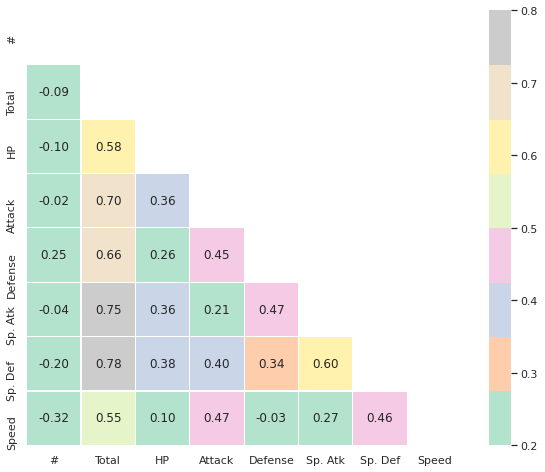

In [16]:
plt.subplots(figsize=(10,8))

lmatrix = np.triu(pkmn.corr())

sns.heatmap(pkmn.corr(),
            annot = True,
            fmt ='.2f',
            vmin = 0.2,
            vmax = 0.8,
            square = True,
            linewidth = 0.2,
            cmap = 'Pastel2',
            mask = lmatrix)

plt.show()

##### Trimming lower part of the heatmap

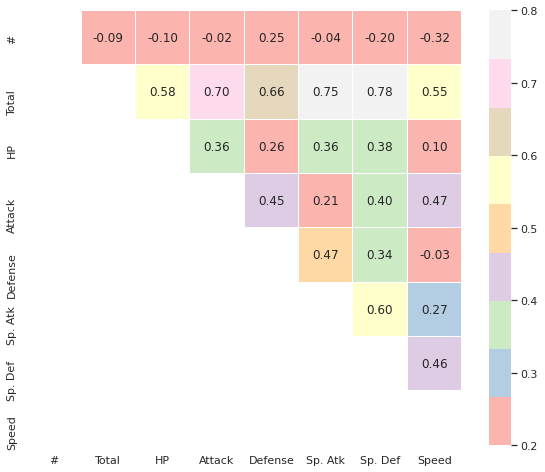

In [17]:
plt.subplots(figsize=(10,8))

umatrix = np.tril(pkmn.corr())
sns.heatmap(pkmn.corr(),
            annot = True,
            fmt = '.2f',
            vmin = 0.2,
            vmax = 0.8,
            square = True,
            linewidth = 0.2,
            cmap = 'Pastel1',
            mask = umatrix)

plt.show()

### Importing seaborn inbuilt dataset

In [3]:
pn = sns.load_dataset('penguins')
pn.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
print(pn['species'].unique())
print(pn['island'].unique())
print(pn['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


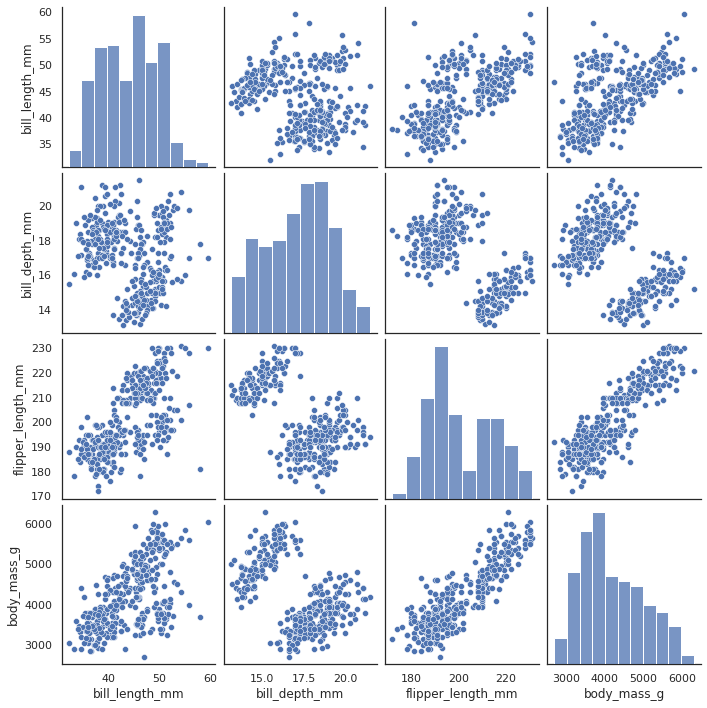

In [20]:
sns.pairplot(pn)

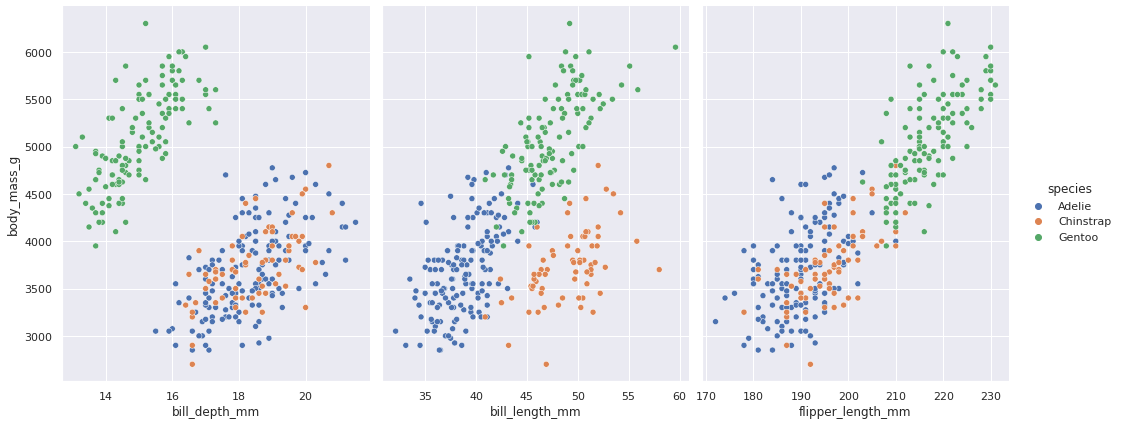

In [18]:
sns.set_theme(style='darkgrid')

sns.pairplot(pn,
             x_vars=['bill_depth_mm','bill_length_mm','flipper_length_mm'],
             y_vars=['body_mass_g'],
             kind='scatter',
             hue='species',
             height=6,
             aspect=0.8,
             diag_kind=None
            )

plt.show()

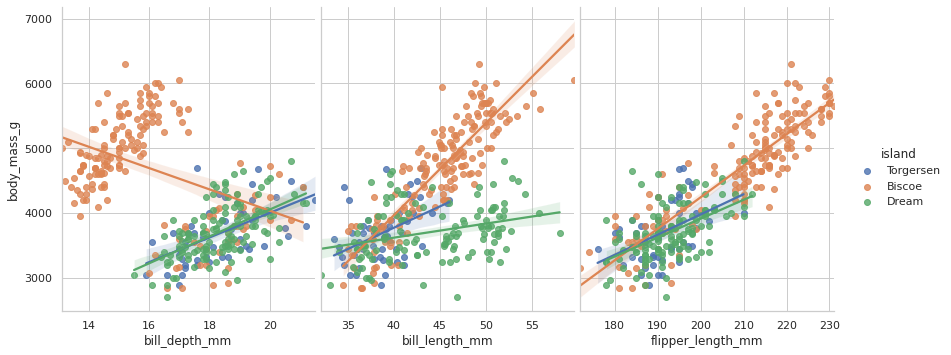

In [26]:
sns.set_theme(style='whitegrid')

sns.pairplot(pn,
             x_vars=['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             diag_kind=None,
             hue='island',
             height=5,
             aspect=0.8,
             kind='reg'
            )

plt.show()